In [3]:
#Poisson-Boltzmann Equation Boundary Value Problem

import scipy.integrate as integrate 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import functions_binding_model as bfunc

from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex = True)
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)

In [ ]:
# number density array [rho_Ca, rho_Na, rho_Cl] for different Ca concentrations

files_to_read = {}

files_to_read["nacl-150mM-na"]  = "/home/rohit/magnesium/mg-netz/nacl-150mM-new/na.den.xvg"
files_to_read["nacl-150mM-cl"]  = "/home/rohit/magnesium/mg-netz/nacl-150mM-new/cl.den.xvg"

files_to_read["netz-07mM-mg"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/mg.den.xvg"
files_to_read["netz-07mM-na"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/na.den.xvg"
files_to_read["netz-07mM-cl"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/cl.den.xvg"
files_to_read["netz-07mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/mg-cum.xvg"
files_to_read["netz-07mM-nacum"]  = "/home/rohit/magnesium/mg-netz/mg-07mM-new/na-cum.xvg"

files_to_read["netz-20mM-mg"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/mg.den.xvg"
files_to_read["netz-20mM-na"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/na.den.xvg"
files_to_read["netz-20mM-cl"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/cl.den.xvg"
files_to_read["netz-20mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/mg-cum.xvg"
files_to_read["netz-20mM-nacum"]  = "/home/rohit/magnesium/mg-netz/mg-20mM-100ns/na-cum.xvg"

files_to_read["netz-33mM-mg"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/mg.den.xvg"
files_to_read["netz-33mM-na"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/na.den.xvg"
files_to_read["netz-33mM-cl"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/cl.den.xvg"
files_to_read["netz-33mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/mg-cum.xvg"
files_to_read["netz-33mM-nacum"]  = "/home/rohit/magnesium/mg-netz/mg-33mM/na-cum.xvg"


files_to_write = {}

files_to_write["nacl-150mM-na"]  = "/home/rohit/magnesium/mg-netz/images/na.pbden.soft.150mM.xvg"
files_to_write["nacl-150mM-cl"]  = "/home/rohit/magnesium/mg-netz/images/cl.pbden.soft.150mM.xvg"
files_to_write["nacl-150mM-nacum"]  = "/home/rohit/magnesium/mg-netz/images/na.pbcum.soft.150mM.xvg"

files_to_write["netz-07mM-mg"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbden.soft.07mM.xvg"
files_to_write["netz-07mM-na"]  = "/home/rohit/magnesium/mg-netz/images/na.pbden.soft.07mM.xvg"
files_to_write["netz-07mM-cl"]  = "/home/rohit/magnesium/mg-netz/images/cl.pbden.soft.07mM.xvg"
files_to_write["netz-07mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbcum.soft.07mM.xvg"
files_to_write["netz-07mM-nacum"]  = "/home/rohit/magnesium/mg-netz/images/na.pbcum.soft.07mM.xvg"

files_to_write["netz-20mM-mg"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbden.soft.20mM.xvg"
files_to_write["netz-20mM-na"]  = "/home/rohit/magnesium/mg-netz/images/na.pbden.soft.20mM.xvg"
files_to_write["netz-20mM-cl"]  = "/home/rohit/magnesium/mg-netz/images/cl.pbden.soft.20mM.xvg"
files_to_write["netz-20mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbcum.soft.20mM.xvg"
files_to_write["netz-20mM-nacum"]  = "/home/rohit/magnesium/mg-netz/images/na.pbcum.soft.20mM.xvg"

files_to_write["netz-33mM-mg"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbden.soft.33mM.xvg"
files_to_write["netz-33mM-na"]  = "/home/rohit/magnesium/mg-netz/images/na.pbden.soft.33mM.xvg"
files_to_write["netz-33mM-cl"]  = "/home/rohit/magnesium/mg-netz/images/cl.pbden.soft.33mM.xvg"
files_to_write["netz-33mM-mgcum"]  = "/home/rohit/magnesium/mg-netz/images/mg.pbcum.soft.33mM.xvg"
files_to_write["netz-33mM-nacum"]  = "/home/rohit/magnesium/mg-netz/images/na.pbcum.soft.33mM.xvg"

'''
conc = {}
conc["nacl-150mM"] = [0.       , 0.0794375, 0.0745260]
conc["netz-07mM"]  = [0.0047453, 0.0904122, 0.0965279]
conc["netz-17mM"]  = [0.0104131, 0.0746450, 0.0943733]
conc["netz-20mM"]  = [0.0125307, 0.0843833, 0.108683]
conc["netz-33mM"]  = [0.0202396, 0.0894419, 0.1284810]
'''

systems = {}
systems["nacl-150mM"] = [0.       , 0.0794375, 0.0745260]
systems["netz-07mM"]  = [0.00426268, 0.0848139, 0.0923875] #[0.0047453, 0.0904122, 0.0965279] 
systems["netz-17mM"]  = [0.0104131, 0.0746450, 0.0943733]
systems["netz-18mM"]  = [0.0108298, 0.0869196, 0.106701]
systems["netz-20mM"]  = [0.0119045, 0.0853042, 0.108446] #[0.0125307, 0.0843833, 0.108683]# 
systems["netz-33mM"]  = [0.0208943, 0.0888704, 0.130001]


Mg_val = [[0.00920802497, 0.09821893302, 0.09208024971],  # eccr 15 mM Mg
          [0.00919923707, 0.09812519548, 0.09199237076],  # kbi 15 mM Mg
          [0.0091989832,  0.09812248752, 0.09198983205],  # netz 07 mM Mg
          [0.01839322883, 0.07970399163, 0.09196614419],  # eccr 30 mM Mg
          [0.01839901953, 0.07972908465, 0.09199509768],  # kbi 30 mM Mg
          [0.01840041536, 0.07973513324, 0.09200207682]]  # netz 17 mM Mg


K = [[0.00306583, 0.11139169, 0.092999673], #eccr 5 mM N/V densities
     [0.00919567, 0.09910884, 0.09297839],  # eccr 15 mM
     [0.01226006, 0.09297212, 0.09297212],  # eccr 20 mM
     [0.01838639, 0.08069582, 0.09295342]]  # eccr 30 mM

M = [[ 0.002889, 0.0928831, 0.0952638], # ECC  5 mM
     [ 0.007183, 0.0842167, 0.0954956], # ECC 15 mM
     [ 0.002512, 0.0932685, 0.0965381], # ECCR 5 mM
     [ 0.007765, 0.0828493, 0.0965449]] # ECCR 15 mM

#sulfate_distribution_data = {}

In [254]:
lb           = 0.78 # SPC/E water at 300K (nm)
four_pi_lb   = 4*np.pi*lb
z_d          = -34
reff         = 2.1
#den_s        = 3*z_d/(4*np.pi*reff**3)
std_volume   = 0.6022140857 
vol_init        = 1.43
vol_injection   = 8.00e-3

N             = 500     
rmax          = 10
r0            = 1e-4
r             = np.linspace(r0, rmax, N)
initial_y     = np.zeros((2, N), dtype = np.float64) 

In [ ]:
'''
def gauss_s(r, prefactor, size_dpgs, sigma_s):
    return prefactor * np.exp( (-(r - size_dpgs)**2) / (2*sigma_s**2) )


def rho(charge, bulk_conc, phi, b2): 
    #b2_fit is 2*B2*rho_in = \beta \mu_i
    return charge * bulk_conc * np.exp( -charge*phi - b2)


def poisson_boltzmann(r, y):
    
    y2 = -pb_prefactor*( rho(+2, mg_conc, y[0], b2_mg) +
                         rho(+1, na_conc, y[0], b2_na) +
                         rho(-1, cl_conc, y[0], 0    ) +
                         den_s*hard_sphere_dist(r, reff, 40)) - 2*y[1]/r       
    return np.vstack((y[1], y2))
'''

In [270]:
def den_s(z_d):
    return 3*z_d/(4*np.pi*reff**3)

def ionic_strength(*conc_in_mM):
    mg_conc, na_conc, cl_conc = conc_in_mM
    return 0.5 * ( 4*mg_conc + na_conc + cl_conc ) * std_volume / 1000

def kappa(I_num_per_nm3):
    #I_num_per_nm3 = I_mmolar * std_volume / 1000
    return (8 * np.pi * lb * I_num_per_nm3 )**0.5

def vol_excl(r, prefactor, sigma):
    return prefactor * np.exp( -r**2 / (2*sigma**2) )

def relative_error(x, y):
    return np.linalg.norm(x-y) / np.linalg.norm(x)

def heaviside_s(r, reff, prefactor): 
    return prefactor*(1 - np.heaviside(r - reff, 0))

def hard_sphere_dist(r, curvature = 40):
    return 1 - 1/(1 + np.exp(-curvature*(r - reff)))

def free_vol_frac(r, eta_dpgs):
    return 1 - eta_dpgs*hard_sphere_dist(r)

def get_bound_ions(r, number_distribution):
    ''' import scipy.integrate as integrate'''

    dr                = r[1] - r[0]
    idx_reff          = np.abs(r - reff).argmin()
    idx_int_limit     = np.abs(r - (reff + 0.1)).argmin()
    local_number      = number_distribution * 4*np.pi*np.power(r, 2)
    cumulative_number = [integrate.trapz(local_number[0:i], r[0:i], dx = dr)
                         for i in range(idx_int_limit)]

    return cumulative_number[idx_reff]


def rho(r, charge, eta_dpgs, bulk_conc, phi):
    #b2_fit is 2*B2*rho_in = \beta \mu_i
    return charge * bulk_conc * np.exp( -charge*phi) * free_vol_frac(r, eta_dpgs)


def poisson_boltzmann(r, y):

    y2 = -pb_prefactor*( rho(r, +2, eta_dpgs, mg_conc, y[0]) +
                         rho(r, +1, eta_dpgs, na_conc, y[0]) +
                         rho(r, -1, eta_dpgs, cl_conc, y[0]) +
                         den_s(z_d)*hard_sphere_dist(r)) - 2*y[1]/r

    return np.vstack((y[1], y2))

def bc(ya, yb):
    # ya = [y(a), y'(a), y''(a)]
    # yb = [y(b), y'(b), y''(b)]
    #return np.array([ya[1] - e_d , yb[1]]) # Neumann 
    return np.array([ya[1], yb[1]]) # Mixed 

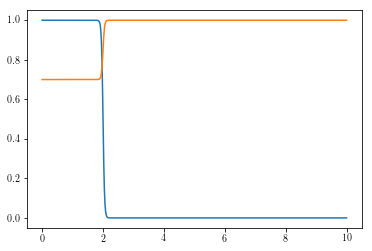

In [191]:
plt.plot(r, hard_sphere_dist(r),r,  free_vol_frac(r, 0.3))

## Make whiskey plot

In [233]:
whiskey_datapoints = 50
#na_conc            = 4 # mM
max_conc_ratio     = 0.6
mg_na_bulkratio    = np.linspace(0, max_conc_ratio, whiskey_datapoints)
#na_conc            = na_conc*std_volume/1000 # mM*std_volume/1000

na_conc_array       = np.linspace(10, 150, 6)*std_volume/1000

mg_conc_array      = [na_conc*mg_na_bulkratio for na_conc in na_conc_array]

cl_conc_array      = [na_conc + 2*mg_conc 
                      for na_conc, mg_conc in zip(na_conc_array, mg_conc_array)]

pairs = [(mg, na, cl) 
         for mg_array, na, cl_array 
             in zip(mg_conc_array, na_conc_array, cl_conc_array)
             for mg, cl
                 in zip(mg_array, cl_array)]

radius_mg, radius_na, radius_cl = 0.132, 0.129, 0.220

In [77]:
bound_mg_array = []
bound_na_array = []

eta_dpgs = 0.5

for mg_conc, na_conc, cl_conc in pairs:
    
    #volume_frac = mg_conc*radius_mg**3 + na_conc*radius_na**3 + cl_conc*radius_cl**3
    
    res = integrate.solve_bvp(poisson_boltzmann, bc, r, initial_y)#, verbose = 2)

    phi = res.sol(r)[0]
    
    rho_mg, rho_na = rho(r, +2, eta_dpgs, mg_conc, phi)/2,\
                     rho(r, +1, eta_dpgs, na_conc, phi)
    
    bound_mg, bound_na = get_bound_ions(r, rho_mg), get_bound_ions(r, rho_na)
    
    bound_mg_array.append(bound_mg)
    bound_na_array.append(bound_na)

bound_mg_array = np.array(bound_mg_array, dtype = np.float64)
bound_na_array = np.array(bound_na_array, dtype = np.float64)

mg_na_boundratio = bound_mg_array / bound_na_array

## Import  CG data

In [268]:
cg_location = "/home/rohit/google-drive/jupyter-notebooks/cg-g2-bound-counterions.csv"
jacek_location = "/home/rohit/google-drive/jupyter-notebooks/whiskey_jacek.csv"

cg_data = pd.read_csv(cg_location, sep = ',', index_col = None,  engine = 'python')
#cg_data['theta_na'] = cg_data['na_bound']/24
#cg_data['theta_mg'] = cg_data['mg_bound']/12
#cg_data['mg_by_na'] = cg_data['mg_bound']/cg_data['na_bound']
cg_data['den_mg'] = cg_data['mg_bound']/(4*np.pi/3*reff**3)
cg_data['den_na'] = cg_data['na_bound']/(4*np.pi/3*reff**3)
cg_data.set_index('conc', inplace = True)
#print(cg_data)

conc = 1

cg_bound  = np.array([cg_data.loc[conc]['mg_bound'],
                      cg_data.loc[conc]['na_bound']], dtype = np.float64)

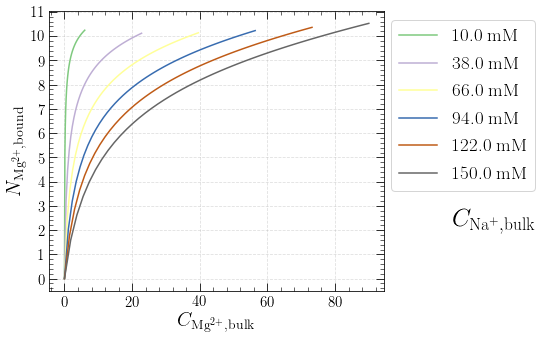

In [184]:
fig = plt.figure()
ax  = fig.add_subplot(111)

jet = plt.get_cmap('Accent')

colors = iter(jet(np.linspace(0,1,6)))

eta_dpgs = 0

for mg_array, na_conc, cl_array in zip(mg_conc_array, na_conc_array, cl_conc_array):
    
    bound_mg_array = []
    
    for mg_conc, cl_conc in zip(mg_array, cl_array):
    
        res = integrate.solve_bvp(poisson_boltzmann, bc, r, initial_y)

        phi = res.sol(r)[0]
    
        rho_mg   = rho(r, +2, eta_dpgs, mg_conc, phi)/2
        bound_mg = get_bound_ions(r, rho_mg)
        bound_mg_array.append(bound_mg)

    bound_mg_array = np.array(bound_mg_array, dtype = np.float64)


    plt.plot(mg_array*1000/std_volume, bound_mg_array,\
             linewidth = 1.5, markersize = 7, \
             label = str(np.round(na_conc*1000/std_volume)) + ' mM',\
             color = next(colors))

'''
plt.plot(mg_conc_array*1000/std_volume, bound_na_array,\
         linewidth = 3, markersize = 10, \
         label = 'Na', color = 'xkcd:red')

plt.plot([0, 1, 3, 5, 10, 15], [0, 2.25, 3.98, 4.88, 6.14, 6.72], 
         marker = 'o', linewidth = 3, linestyle = '--', markersize = 10,
        label = 'CG Mg')

plt.plot([0, 1, 3, 5, 10, 15], [13.2, 10.2, 8.4, 7.3, 6.3, 5.7], 
         marker = 's', linewidth = 3, linestyle = '--', markersize = 10,
        label = 'CG Na')



plt.plot(whiskey_jacek['x'], whiskey_jacek['y'], linestyle = '--', marker = 's',\
         label = 'ITC', color = 'xkcd:red')
'''

plotify(x_major_ticks = 20, x_minor_ticks = 5, y_major_ticks = 1 , y_minor_ticks = 5)
            
plt.show()

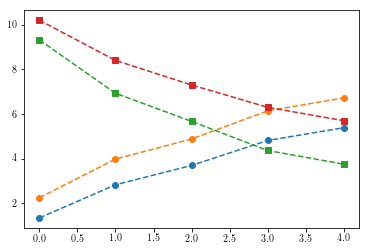

In [317]:
cg_conc_array = [1, 3, 5, 10, 15]

dtp = np.dtype([('conc' , np.float64),
                ('error', np.float64),
                ('b2_mg', np.float64),
                ('b2_na', np.float64),
                ('tpbmg'  , np.float64),
                ('tpbna'  , np.float64),
                ('tcgmg'  , np.float64),
                ('tcgna'  , np.float64)])

db = np.zeros(1, dtype = dtp)

for conc in cg_conc_array:

    sol = bfunc.open_and_assign('pb_cg_' + str(conc) + '_tol_0.25.p')

    #sol_min = sol[sol['error'] == np.min(sol['error'])]
    error = np.average(sol['error'])
    b2_mg = np.average(sol['b2'][:,0])
    b2_na = np.average(sol['b2'][:,1])
    tmg   = np.average(sol['theta'][:,0]*12)
    tna   = np.average(sol['theta'][:,1]*24)

    cg_theta  = np.array([cg_data.loc[conc]['mg_bound'],
                          cg_data.loc[conc]['na_bound']], dtype = np.float64)
    
    e = np.array([(conc, error, b2_mg, b2_na, tmg, tna, cg_theta[0], cg_theta[1])],
                 dtype = dtp)
    
    db = np.append(db, e)
    
db = np.delete(db, 0)

df = pd.DataFrame(db)

plt.plot(df['tpbmg'], marker = 'o', linestyle = '--')
plt.plot(df['tcgmg'], marker = 'o', linestyle = '--')
plt.plot(df['tpbna'], marker = 's', linestyle = '--')
plt.plot(df['tcgna'], marker = 's', linestyle = '--')

## PB with ITC

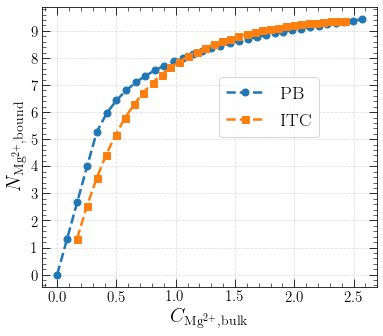

In [245]:
mg_conc         = 0
mg_conc_tot     = 0
na_conc         = 4*std_volume/1000
cl_conc         = 4*std_volume/1000
dpgs_conc_init  = 0.0638*std_volume/1000
mg_inj          = 15.190*std_volume/1000
eta_dpgs        = 0.32
nmg_inj         = mg_inj * vol_injection
n_dpgs          = dpgs_conc_init * vol_init

jacek_location = "/home/rohit/google-drive/jupyter-notebooks/whiskey_jacek.csv"
#"/home/lto/mdanalysis/whiskey_jacek.csv"

whiskey_jacek = pd.read_csv(jacek_location, sep = ',',
                            index_col = None, engine = 'python')
whiskey_jacek.columns = ['x', 'y']
whiskey_jacek.x = whiskey_jacek.x*na_conc*1000/std_volume

injections = list(whiskey_jacek.index + 1)


mg_conc_array       = [mg_conc]
mg_conc_total_array = [mg_conc_tot]
zd_array            = [z_d]

res      = integrate.solve_bvp(poisson_boltzmann, bc, r, initial_y)
phi      = res.sol(r)[0]
rho_na   = rho(r, +1, eta_dpgs, na_conc, phi)

bound_mg_cumulative = 0
bound_mg_array      = [bound_mg_cumulative]
bound_na_cumulative = get_bound_ions(r, rho_na)
bound_na_array      = [bound_na_cumulative]

z_d     += bound_na_cumulative
zd_array.append(z_d)


for inj in injections:

    vol       = vol_init + inj*vol_injection

    mg_conc_tot += nmg_inj / vol
    mg_conc     += nmg_inj / vol
    cl_conc      = 2*mg_conc + na_conc
    dpgs_conc    = n_dpgs / vol

    res          = integrate.solve_bvp(poisson_boltzmann, bc, r, initial_y)

    phi          = res.sol(r)[0]

    rho_mg       = rho(r, +2, eta_dpgs, mg_conc, phi)/2
    rho_na       = rho(r, +1, eta_dpgs, na_conc, phi)

    bound_mg     = get_bound_ions(r, rho_mg)
    bound_na     = get_bound_ions(r, rho_na)


    if mg_conc < bound_mg*dpgs_conc:

        bound_mg = mg_conc / dpgs_conc
        bound_na = 0

        z_d     += bound_mg
        mg_conc  = 0

    elif z_d + bound_mg + bound_na < 0:

        z_d     += bound_mg + bound_na
        mg_conc -= bound_mg * dpgs_conc

    elif z_d < 0:

        bound_na = 0

        if z_d + bound_mg <= 0:

            z_d     += bound_mg
            mg_conc -= bound_mg * dpgs_conc

        else:

            bound_mg = -z_d
            z_d      = 0
            mg_conc -= bound_mg * dpgs_conc

    else:

        bound_mg = 0
        bound_na = 0

    bound_mg_cumulative += bound_mg
    bound_na_cumulative += bound_na

    bound_mg_array.append(bound_mg_cumulative)
    bound_na_array.append(bound_na_cumulative)
    zd_array.append(z_d)
    mg_conc_array.append(mg_conc)
    mg_conc_total_array.append(mg_conc_tot)


bound_mg_array       = np.array(bound_mg_array, dtype = np.float64)
bound_na_array       = np.array(bound_na_array, dtype = np.float64)
mg_conc_array        = np.array(mg_conc_array , dtype = np.float64)*1000/std_volume
mg_conc_total_array  = np.array(mg_conc_total_array , dtype = np.float64)*1000/std_volume
zd_array             = np.array(zd_array      , dtype = np.float64)



fig = plt.figure()
ax  = fig.add_subplot(111)

plt.plot(mg_conc_total_array , bound_mg_array, linestyle = '--', linewidth  = 2.5,
         marker = 'o', markersize = 7, label = 'PB')

plt.plot(whiskey_jacek['x'], whiskey_jacek['y'], linestyle = '--', linewidth = 2.5,
         marker = 's', markersize = 7, label = 'ITC' )

plotify(x_major_ticks = 0.5, x_minor_ticks = 5,
        y_major_ticks = 1 , y_minor_ticks = 5,
        xname         = r"$\displaystyle C_{{\rm Mg^{2+}},{\rm bulk}}$ (mM)",
        yname         = r"$\displaystyle N_{{\rm Mg^{2+}},{\rm bound}}$",
        legend_location = (.98, 0.5, 0.5, 0.5))

plt.show()

In [40]:
mg_b2_rho_in_times2 = 10*8*(.3/1.9)**3
na_b2_rho_in_times2 = 15*8*(.3/1.9)**3
print(mg_b2_rho_in_times2, na_b2_rho_in_times2)

0.3149147105992127 0.472372065898819


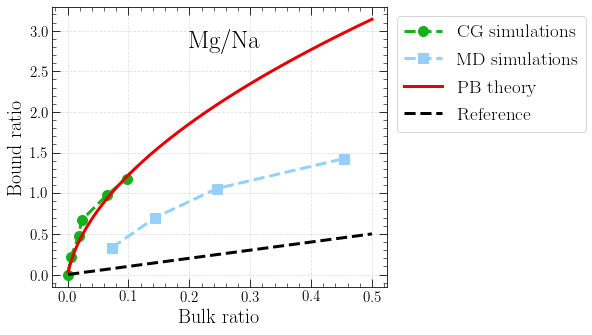

In [161]:
cg_boundratio = pd.Series(cg_data['mg_by_na'])
cg_bulkratio  = (cg_data['mg_total']- cg_data['mg_bound'])/\
                (cg_data['na_total']- cg_data['na_bound'])
md_boundratio = [0.328640, 0.7, 1.058235, 1.424771] # i=1  0.523426
md_bulkratio  = [0.07236672584302155, 0.14405807509309024,
                0.24518605081457234, 0.4533333333333333] 

fig = plt.figure()
ax  = fig.add_subplot(111)

plt.plot(cg_bulkratio, cg_boundratio, \
         marker = 'o', linestyle = '--', linewidth = 3, markersize = 10, \
         label = 'CG simulations', color = 'xkcd:green')

plt.plot(md_bulkratio, md_boundratio, \
         marker = 's', linestyle = '--', linewidth = 3, markersize = 10, \
         label = 'MD simulations', color = 'xkcd:light blue')

plt.plot(mg_na_bulkratio, mg_na_boundratio, linestyle = '-',\
         linewidth = 3, markersize = 10, \
         label = 'PB theory', color = 'xkcd:red')

plt.plot(mg_na_bulkratio, mg_na_bulkratio, linestyle = '--',\
         linewidth = 3, markersize = 10, \
         label = 'Reference', color = 'xkcd:black')


plotify(x_major_ticks = 0.1, x_minor_ticks = 5,
        y_major_ticks = 0.5, y_minor_ticks = 5,
        xname = r"Bulk ratio", yname = r"Bound ratio",
        legend_location = (1, 0.5, 0.5, 0.5))

plt.show()

## Get ion radius from B2

In [283]:
def get_ion_radius_from_b2_term(b2_term, bound_ions):
    rho_in = bound_ions / (4*np.pi/3*reff**3)
    b2 = b2_term / rho_in / 2
    return 0.5*(3/2/np.pi*b2)**(1/3)

print(2*np.pi/3*8*0.132**3)

0.03853633371888859


## Make plot pretty

In [269]:
def plotify(x_major_ticks   = 30, x_minor_ticks = 5,
            y_major_ticks   = 1 , y_minor_ticks = 5,
            xname           = r"$\displaystyle C_{{\rm Mg^{2+}},{\rm bulk}}$",
            yname           = r"$\displaystyle N_{{\rm Mg^{2+}},{\rm bound}}$",
            legend_location = (.98, 0.5, 0.5, 0.5),
            image_name       = 'new_plot.png',
            save            = False):
    
    plt.grid(True)
    
    ax.tick_params(which = 'major', direction = 'in',\
               length = 8, top = True, right = True)

    ax.tick_params(which = 'minor', direction = 'in',\
               length = 4, top = True, right = True)

    ax.tick_params(labelsize = 15, grid_alpha = 0.4, grid_linestyle = '--')

    ax.set_axisbelow(True)

    ax.xaxis.set_major_locator(MultipleLocator(x_major_ticks))
    ax.xaxis.set_minor_locator(AutoMinorLocator(x_minor_ticks)) # for the minor ticks,
                                                # use no labels; default NullFormatter
    
    ax.yaxis.set_major_locator(MultipleLocator(y_major_ticks))
    ax.yaxis.set_minor_locator(AutoMinorLocator(y_minor_ticks)) 

    xlabel, ylabel = xname, yname
    #xlabel = r"$\displaystyle C^{\rm bulk}_{\rm Mg^{2+}} / C^{\rm bulk}_{\rm Na^{+}}$"
    #ylabel = r"$\displaystyle N_{\rm Mg^{2+}} / N_{\rm Na^{+}}$"
    
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)
    
    
    font = {'family': 'serif',
            'color':  'xkcd:black',
            'weight': 'normal',
            'size': 25,
            }

    #plt.text(115, 2, r"$\displaystyle C_{{\rm Na^{+}},{\rm bulk}}$",fontdict=font)
    
    
    plt.legend(fontsize = 19, loc = 0, bbox_to_anchor = legend_location)
    plt.subplots_adjust(top = 1.1)
    
    if save is True:
        direc = '/home/rohit/google-drive/magnesium/mg-netz/images/'
        image_name = direc + image_name
        plt.savefig(image_name, bbox_inches = 'tight', dpi = 200)

In [8]:
def parse_data(data_file):

    with open(data_file) as file:
        
        lines = file.readlines()

    a = ([line.strip().split() for line in lines])

# turn array strings into numbers
    
    b = np.array(a)
    u = b.astype(np.float)

    r = u[:,0] # radial distance
    c = u[:,1] # charge density

    #return np.vstack((r, c))
    return r, c

## Find amplitude for sulfate distribution

In [191]:
rd = np.arange(0.8, 2.0, 0.1)
sigma_s     = 0.3
least_count_c_array = 1
C_array   = np.arange(0, 20, least_count_c_array)

def find_amplitude_s_den(r, C_array, size_dpgs, sigma):
    
    residual = []
    
    for C_item in C_array:
        
        n_local = [ gauss_s(r_i, C_item, size_dpgs, sigma)
                   * 4*np.pi*r_i**2 for r_i in r ]
        
        N       = [ integrate.trapz( n_local[0:i], r[0:i], dx = dr )
                    for i in range(len(r)) ]
         
        residual.append( abs(z_d + N[-1]) )
        
    return C_array[ np.where( residual == min(residual) )[0][0] ], min(residual)



def refine_amplitude_value(r, C_array, size_dpgs, sigma):
    
    amplitude = find_amplitude_s_den(r, C_array, size_dpgs, sigma)[0] 
    res       = find_amplitude_s_den(r, C_array, size_dpgs, sigma)[1]
    
    margin = least_count_c_array
    step   = 0.1 * margin
    
    for _ in range(4):
    
        C_array   = np.arange(amplitude - margin, amplitude + margin, step)
    
        amplitude = find_amplitude_s_den(r, C_array, size_dpgs, sigma)[0]
        res       = find_amplitude_s_den(r, C_array, size_dpgs, sigma)[1]
        
        margin, step = 0.1*margin, 0.1*step
    
    return amplitude, res

amplitudes = [ refine_amplitude_value(r, C_array, size, sigma_s) for size in rd ]

In [192]:
# array of rd and corresponding amplitude for sulfate gaussian distribution, for sigma_s = 0.1
print("rd\tC\tsigma_s\n")

sulfate_distribution_data[str(sigma_s)] = np.zeros((len(rd), 3))

for i in range(len(rd)):
    print(rd[i], "\t", amplitudes[i][0], "\t", sigma_s)
    sulfate_distribution_data[str(sigma_s)][i] = [ rd[i], amplitudes[i][0], sigma_s ]

rd	C	sigma_s

0.8 	 3.479400000000002 	 0.3
0.9 	 2.821999999999999 	 0.3
1.0 	 2.3301 	 0.3
1.1 	 1.9536999999999993 	 0.3
1.2 	 1.6599999999999995 	 0.3
1.2999999999999998 	 1.4267999999999994 	 0.3
1.4 	 1.2388999999999992 	 0.3
1.5 	 1.0853999999999995 	 0.3
1.5999999999999999 	 0.9583999999999999 	 0.3
1.6999999999999997 	 0.8523 	 0.3
1.7999999999999998 	 0.7627 	 0.3
1.8999999999999997 	 0.6864 	 0.3


In [378]:
def sum_residual(rmin, rmax, r_pb, r_sim, rho_pb, rho_sim, number_of_points): 
    # it takes pb fit and simulation den, 
    # creates equal data points by interpolation and evaluates the residual
    
    rnew = np.linspace(rmin, rmax, number_of_points)

    tck1 = interpolate.splrep(r_pb, rho_pb)
    rho_pb_new = interpolate.splev(rnew, tck1)

    tck2 = interpolate.splrep(r_sim, rho_sim)
    rho_sim_new = interpolate.splev(rnew, tck2)

    sum_residual = np.sum( (rho_pb_new - rho_sim_new)**2 )
    
    return sum_residual